# Titanic - Machine Learning from Disaster

> Predict survival on the Titanic and get familiar with ML basics

References:<br>
[Data Sources](https://www.kaggle.com/c/titanic/data) <br>
[Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)<br>

Task:
    
1. EDA (Exploratory Data Analysis)

        a. check basic info of dataset
        b. Data Visualization

2. Data Processing

        a. deal with missing value
        b. Transforms categorical features to vectors

3. Fit different models

        a. Random Forest
        b. XGBoost

4. predict the data for kaggle submission

#### Kaggle submission result

![subsmission result](https://github.com/vivianchang2019/Titanic_kaggle/blob/master/result/Titanic.JPG?raw=true)

# 1. EDA (Exploratory Data Analysis)

In [45]:
import pandas as pd
import numpy as np

In [46]:
df_train = pd.read_csv('data/titanic/train.csv')
df_test = pd.read_csv('data/titanic/test.csv')

## a. check basic info of dataset

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Show Descriptive statistics of numerical data. 

In [49]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Show Descriptive statistics of categorical data. 

In [50]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hewlett, Mrs. (Mary D Kingcome)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


No Anomaly found in Descriptive statistics. 

## b. Data Visualization

In [51]:
import matplotlib.pyplot as plt

In [52]:
group_1 = df_train[[ 'Pclass', 'Survived']].groupby(['Pclass']).agg(np.mean)
df1 = pd.DataFrame(group_1).reset_index()

group_2 = df_train[[ 'Sex', 'Survived']].groupby(['Sex']).agg(np.mean)
df2 = pd.DataFrame(group_2).reset_index()

group_3 = df_train[[ 'SibSp', 'Survived']].groupby(['SibSp']).agg(np.mean)
df3 = pd.DataFrame(group_3).reset_index()

group_4 = df_train[[ 'Parch', 'Survived']].groupby(['Parch']).agg(np.mean)
df4 = pd.DataFrame(group_4).reset_index()

Text(0.5, 1.0, 'Survival ratio by Parch')

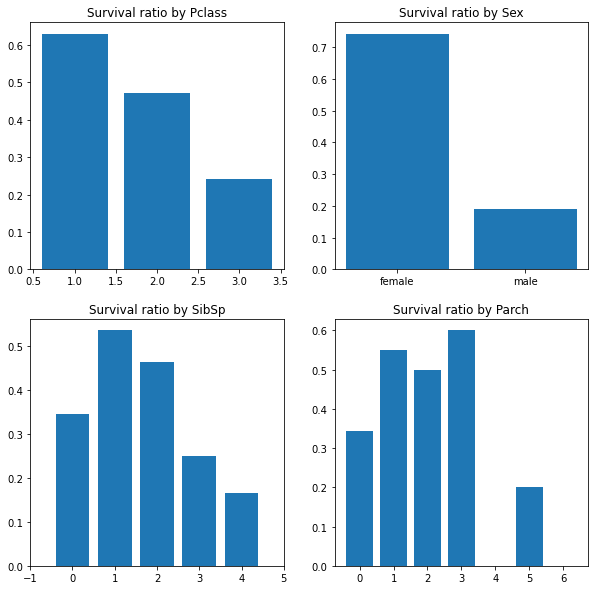

In [53]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.bar(df1['Pclass'],df1['Survived'])
plt.title('Survival ratio by Pclass')

plt.subplot(2, 2, 2)
plt.bar(df2['Sex'],df2['Survived'])
plt.title('Survival ratio by Sex')

plt.subplot(2, 2, 3)
plt.bar(df3['SibSp'],df3['Survived'])
plt.xlim([-1, 5])
plt.title('Survival ratio by SibSp')

plt.subplot(2, 2, 4)
plt.bar(df4['Parch'],df4['Survived'])
plt.title('Survival ratio by Parch')

In [54]:
import seaborn as sns

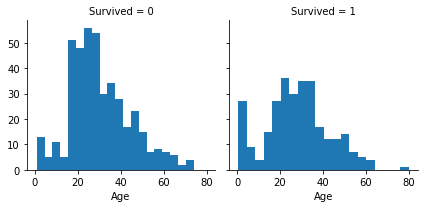

In [55]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

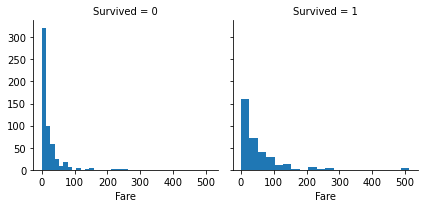

In [56]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

In [57]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\VivianChang\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\VivianChang\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


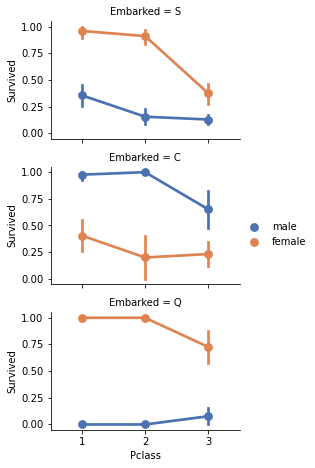

In [58]:
grid = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [59]:
corr = df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

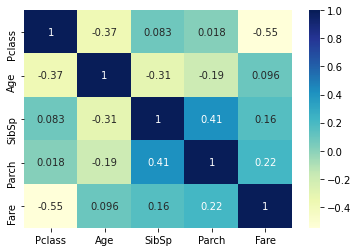

In [60]:
sns.heatmap(corr, annot = True, cmap="YlGnBu")

# 2. Data Preparation

In [61]:
select_features = ['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch', 'Fare']

In [62]:
X_train = df_train[select_features]
y_train = df_train['Survived']

X_test = df_test[select_features]

## a. deal with missing value

In [63]:
X_train.isna().sum(axis = 0)

Pclass        0
Sex           0
Age         177
Embarked      2
SibSp         0
Parch         0
Fare          0
dtype: int64

In [64]:
X_test.isna().sum(axis = 0)

Pclass       0
Sex          0
Age         86
Embarked     0
SibSp        0
Parch        0
Fare         1
dtype: int64

Fill in missing value of 'Categorical data' with the value of higest frequency

In [66]:
X_train['Embarked'].fillna('S', inplace=True)

C:\Users\VivianChang\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Fill in missing value of 'numerical data' with the mean value.

In [68]:
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

In [69]:
# check the result after fill in missing value
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [70]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    object 
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


## b. Transforms categorical features to vectors

In [71]:
from sklearn.feature_extraction import DictVectorizer 

vec = DictVectorizer(sparse=False)
X_train = vec.fit_transform(X_train.to_dict(orient = 'record'))
X_test = vec.transform(X_test.to_dict(orient = 'record')) 

In [72]:
vec.feature_names_

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex=female',
 'Sex=male',
 'SibSp']

# 2. Fit different Models

## a. Random Forest

In [73]:
# try Random Forest with default parameter

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()


In [74]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.8092398468394955

## b. XGBoost

[API document](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

In [75]:
# try XGBoost with default parameter

from xgboost.sklearn import XGBClassifier

xgbc = XGBClassifier()

cross_val_score(xgbc, X_train, y_train, cv=5).mean()

0.8103508882053857

In [76]:
# try XGBoost with GridsearchCV

from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(2,7), 'n_estimators': range(100, 1100, 200),
         'learning_rate': [0.05, 0.1, 0.25, 0.5, 1.0]}

xgbc_best = XGBClassifier()
gs = GridSearchCV(xgbc_best, params, verbose=1, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:   37.6s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [77]:
print(gs.best_score_)
print(gs.best_params_)

0.8350323269097985
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


# 4. predict the data for kaggle submission

In [78]:
# Random Forest result submission

rfc.fit(X_train, y_train)
rfc_y_predict = rfc.predict(X_test)

rfc_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': rfc_y_predict})
# rfc_submission.to_csv('result/Titanic_rfc_submission.csv', index = False)

In [79]:
# XGBboost result submission

xgbc.fit(X_train, y_train)
xgbc_y_predict = gs.predict(X_test)

xgbc_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': xgbc_y_predict})
# xgbc_submission.to_csv('result/Titanic_xgbc_submission.csv', index = False)

In [80]:
# XGBboost with GridSearch result submission

xgbc_best_y_predict = gs.predict(X_test)

xgbc_best_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': xgbc_best_y_predict})
# xgbc_best_submission.to_csv('result/Titanic_xgbc_best_submission.csv', index = False)